In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

daten = pd.read_csv('../PyCharm/daten.csv')
features = daten.drop(columns=['genre'])
labels = daten['genre']

#Daten normalisieren:
scaler = MinMaxScaler() 
scaler.fit(features) #scaler an die Daten anpassen (damit z.B. max und min bestimmt wird)
features_n = scaler.transform(features) # Daten mit den vorher festgelegten/bestimmten Werte (min/max) normalisieren.

#Datensatz trennen
X_train, X_test, Y_train, Y_test = train_test_split(features_n,labels,test_size=0.2,shuffle = True, random_state=27)

In [2]:
#darstellen der normalisierten und getrennten daten
inhalt = X_train
pd.DataFrame(inhalt, columns=["BPM", "rolloff", "centroid", "rms", "zcr", "mfcc1", "mfcc2", "mfcc3", "mfcc4", "mfcc5", "mfcc6", "mfcc7", "mfcc8", "mfcc9", "mfcc10", "mfcc11", "mfcc12", "mfcc13"])

,BPM,rolloff,centroid,rms,zcr,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13
0,0.646552,0.684123,0.539323,0.631249,0.315942,0.876526,0.252046,0.622547,0.454076,0.610645,0.697885,0.541247,0.578759,0.543343,0.671216,0.465678,0.821905,0.604885
1,0.323838,0.448744,0.371726,0.210471,0.226061,0.466604,0.333337,0.590405,0.412244,0.432818,0.529577,0.377137,0.452215,0.480175,0.417200,0.304973,0.633790,0.270043
2,0.584178,0.856851,0.786418,0.624894,0.646408,0.917323,0.131538,0.581188,0.199273,0.279438,0.551137,0.360946,0.463718,0.570634,0.629729,0.520673,0.690587,0.542782
3,0.394089,0.585349,0.432602,0.412582,0.210756,0.652113,0.323727,0.774059,0.346774,0.457675,0.637712,0.351120,0.546011,0.705861,0.657686,0.779528,0.680004,0.477636
4,0.357367,0.711424,0.555551,0.703609,0.331672,0.865403,0.278207,0.635218,0.238107,0.435363,0.552129,0.459956,0.478180,0.552015,0.705421,0.617387,0.759449,0.487934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,0.584178,0.346981,0.303054,0.280637,0.224671,0.514127,0.421700,0.445184,0.419751,0.108911,0.443656,0.387699,0.619432,0.594490,0.689596,0.613760,0.793218,0.423929
297,0.264828,0.600467,0.551365,0.620868,0.514521,0.947379,0.264168,0.449867,0.399782,0.399960,0.620982,0.412921,0.624134,0.762254,0.710727,0.561086,0.784000,0.560832
298,0.479129,0.177875,0.173132,0.272902,0.153047,0.468192,0.582291,0.452752,0.346984,0.579019,0.559491,0.470129,0.414883,0.677237,0.513788,0.642015,0.531678,0.303476
299,0.394089,0.856347,0.696131,0.642043,0.444315,0.854701,0.194472,0.771477,0.310177,0.542480,0.610817,0.424592,0.557584,0.545858,0.682714,0.549136,0.708580,0.501140


In [21]:
from sklearn import svm
from sklearn import metrics
clf = svm.SVC()
clf.fit(X_train, Y_train)

vorhersagen = clf.predict(X_test)
clf.score (X_test, Y_test)

0.7894736842105263

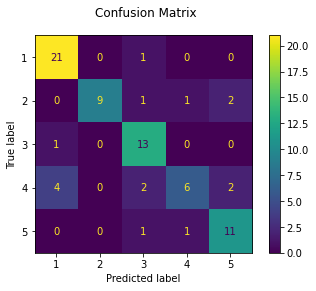

In [22]:
import matplotlib.pyplot as plt

disp = metrics.plot_confusion_matrix(clf, X_test, Y_test)
disp.figure_.suptitle("Confusion Matrix")

plt.show()

In [23]:
#Cross-Validation
from sklearn.model_selection import cross_val_score
ergebnis = cross_val_score(clf, X_test, Y_test, cv=12)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.75 accuracy with a standard deviation of 0.16
